In [2]:
!python --version

Python 3.10.14


In [3]:
import gc
gc.collect()

689

In [4]:
in_colab = False

In [5]:
if in_colab:

  from google.colab import drive
  drive.mount("/content/drive/", force_remount = True)

In [6]:
if in_colab:
  !pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 #-f https://download.pytorch.org/whl/cu121

In [7]:
if in_colab:
  !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.3.0+cpu.html#torch-2.3.0+cu121.html

In [8]:
if in_colab:
  !pip install torch_geometric

In [9]:
if in_colab:
  import locale
  def getpreferredencoding(do_setlocale = True):
      return "UTF-8"
  locale.getpreferredencoding = getpreferredencoding
  !pip install pygod

In [10]:
import torch
torch.__version__

'2.4.0+cu121'

In [11]:
if in_colab:
  %cd "/content/drive/MyDrive/Colab Notebooks/GraphOutlierDetection"

In [12]:
import os
cwd = os.getcwd()
sep = os.sep
datapath = cwd + sep + "use_case" + sep + "data" + sep + "bladder_cancer" + sep + "gene_expression_data_preprocessed.csv"
datapath

'C:\\Users\\ugo-c\\Desktop\\ADIN\\use_case\\data\\temporal\\GSE30550_series_matrix.txt'

In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv(datapath, index_col=0)
data

ATP2A1     SLMAP     MEOX2     HOXD3    ZNF398     PANX1  \
GSM928410  0.663336  0.529598  0.162563  0.383908  0.096852  0.137029   
GSM928411  0.732851  0.637804  0.087245  0.364565  0.100989  0.104867   
GSM928412  0.731909  0.467229  0.151392  0.410514  0.105380  0.118404   
GSM928413  0.756482  0.712974  0.125020  0.438931  0.072189  0.117990   
GSM928414  0.627336  0.374188  0.072009  0.564686  0.083819  0.094375   
GSM928415  0.668793  0.394460  0.122008  0.392940  0.084649  0.105771   
GSM928416  0.426092  0.256789  0.158605  0.744571  0.093180  0.117594   
GSM928417  0.543068  0.161934  0.095487  0.781442  0.045247  0.119621   
GSM928418  0.806099  0.783551  0.182352  0.764526  0.086602  0.122421   
GSM928419  0.535368  0.125626  0.101444  0.811086  0.027037  0.069629   
GSM928420  0.703619  0.676400  0.111034  0.846040  0.037037  0.118240   
GSM928421  0.817144  0.093566  0.119262  0.794505  0.022453  0.231460   
GSM928422  0.409728  0.093750  0.088316  0.805207  0.015399  0.108503   
GSM928423  0.543978  0.189580  0.109502  0.705171  0.033869  0.220051   
GSM928424  0.832374  0.129283  0.031621  0.798701  0.018344  0.089821   
GSM928425  0.815578  0.315857  0.046209  0.871397  0.018025  0.070097   
GSM928426  0.418700  0.074661  0.040767  0.823890  0.015405  0.054142   
GSM928427  0.750107  0.308633  0.022222  0.841576  0.014033  0.037842   
GSM928428  0.733186  0.130307  0.042095  0.802706  0.015738  0.071776   
GSM928429  0.604937  0.100124  0.033127  0.841069  0.018455  0.052406   
GSM928430  0.437868  0.140084  0.519438  0.684985  0.016173  0.076557   
GSM928431  0.298159  0.138758  0.058877  0.752970  0.024597  0.052569   
GSM928432  0.328170  0.076230  0.345729  0.778197  0.025442  0.065034   
GSM928433  0.184375  0.109300  0.026707  0.839303  0.018748  0.086138   

              COX8C     IMPA2      TTC8  FLJ35816  ...    ZFP2.1   CST9L.1  \
GSM928410  0.971139  0.039016  0.029115  0.530092  ...  0.174781  0.759511   
GSM928411  0.968545  0.046063  0.035143  0.592064  ...  0.094503  0.747333   
GSM928412  0.961028  0.043965  0.031300  0.554694  ...  0.110763  0.764336   
GSM928413  0.971448  0.044214  0.031502  0.587456  ...  0.052426  0.775798   
GSM928414  0.968190  0.028884  0.018645  0.596519  ...  0.043576  0.792672   
GSM928415  0.973028  0.041213  0.023148  0.579087  ...  0.113668  0.757963   
GSM928416  0.971882  0.050376  0.049978  0.508073  ...  0.052173  0.777005   
GSM928417  0.964217  0.040574  0.030213  0.378127  ...  0.051021  0.745892   
GSM928418  0.963932  0.043778  0.030160  0.501038  ...  0.060801  0.801456   
GSM928419  0.970158  0.032499  0.022672  0.557364  ...  0.042587  0.790621   
GSM928420  0.978038  0.029411  0.024753  0.489507  ...  0.031715  0.524165   
GSM928421  0.982106  0.031482  0.013398  0.573627  ...  0.022869  0.814041   
GSM928422  0.978841  0.026527  0.016016  0.512338  ...  0.030848  0.775920   
GSM928423  0.976979  0.023748  0.011903  0.613839  ...  0.043739  0.802150   
GSM928424  0.980335  0.022257  0.009273  0.518569  ...  0.038415  0.821270   
GSM928425  0.981824  0.025346  0.009612  0.579383  ...  0.019224  0.835004   
GSM928426  0.982683  0.024076  0.009506  0.470287  ...  0.020391  0.786767   
GSM928427  0.986313  0.021968  0.009482  0.573926  ...  0.021235  0.826842   
GSM928428  0.979202  0.019832  0.010430  0.534893  ...  0.022399  0.815613   
GSM928429  0.977567  0.023292  0.013491  0.562744  ...  0.021738  0.832677   
GSM928430  0.978034  0.023050  0.011165  0.481810  ...  0.042978  0.518412   
GSM928431  0.984636  0.024411  0.012639  0.462050  ...  0.025951  0.793100   
GSM928432  0.976318  0.022026  0.015277  0.549231  ...  0.016248  0.747001   
GSM928433  0.984204  0.015195  0.006160  0.437519  ...  0.026670  0.155150   

           C11orf24.1    QPRT.1  LEPRE1.1   GNAS.29    RPN1.1   CYB5A.1  \
GSM928410    0.103661  0.200964  0.200289  0.397994  0.031667  0.116547   
GSM928411    0.085542  0.224168  0.103062  0.376746  0.028174  0.069490   
GSM928412  

In [17]:
index = data.index
index

Index(['GSM928410', 'GSM928411', 'GSM928412', 'GSM928413', 'GSM928414',
       'GSM928415', 'GSM928416', 'GSM928417', 'GSM928418', 'GSM928419',
       'GSM928420', 'GSM928421', 'GSM928422', 'GSM928423', 'GSM928424',
       'GSM928425', 'GSM928426', 'GSM928427', 'GSM928428', 'GSM928429',
       'GSM928430', 'GSM928431', 'GSM928432', 'GSM928433'],
      dtype='object')

In [18]:
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, cross_val_predict
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score as accuracy
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.decomposition import PCA

from scipy.stats import mode

In [19]:
data.isnull().any().any()

False

In [20]:
target_names = data['Target'].unique()
target_names

array([0, 1], dtype=int64)

In [21]:
#ROC curves and AUC metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

def plot_roc_curve_(y, y_pred):
    # calculate the fpr, tpr, AUC and plot the ROC curve
    '''
    input:
    y: array-like contenente i valori dell'attributo target
    y_pred: array-like contenente le predizioni dell'attributo target
    output: None

    '''
    y = np.array(y)       #cast array-like in numpy array
    y_pred = np.array(y_pred)
    y = MinMaxScaler(feature_range=(0,1)).fit_transform(y.reshape(-1, 1)) #trasformo le labels da 1 2 a 0 1
    y_pred = MinMaxScaler(feature_range=(0,1)).fit_transform(y_pred.reshape(-1, 1))
    labels = np.unique(y)
    fpr, tpr, threshold = roc_curve(y, y_pred)
    #print(fpr, tpr)
    roc_auc = round(auc(fpr, tpr),2)

    pyplot.title('ROC curve')
    pyplot.plot(fpr, tpr, 'b', label = 'AUC {}'.format(roc_auc))
    pyplot.legend(loc = 'lower right')
    pyplot.plot(labels, labels,'r--')
    pyplot.xlim(labels)
    pyplot.ylim(labels)
    pyplot.ylabel('True Positive Rate')
    pyplot.xlabel('False Positive Rate')
    pyplot.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis=1).values, data['Target'].values, test_size=0.7, stratify = data['Target'])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7, 27551), (7,), (17, 27551), (17,))

In [23]:
y_train, y_test

(array([0, 1, 1, 1, 1, 0, 1], dtype=int64),
 array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64))

In [24]:
X_train.shape, y_train.shape

((7, 27551), (7,))

In [25]:
y_train

array([0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [28]:
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

def comparazioneBaseline(X, y, scoring = 'accuracy', class_weight=True):
    '''input:
    X: array-like
    y: array-like contenente i valori dell'attributo target
    scoring: string che specifica che metrica utilizzare nella crossvalidation, default 'accuracy'
    class_weight: boolean, True se vogliamo fare una classificazione. default True
    output: None
    '''
    # Array contenente vari algoritmi di classificazione da testare
    models = []

    if(class_weight):
        cw = 'balanced'
    else:
        cw = None
        models.append(('LDA', LinearDiscriminantAnalysis()))
        models.append(('NB', GaussianNB()))

    models.append(('LR', LogisticRegression(solver='lbfgs',max_iter=100,class_weight=cw)))
    models.append(('KNN', KNeighborsClassifier(2, weights='distance')))
    models.append(('DT', DecisionTreeClassifier(class_weight=cw)))
    models.append(('SVM', SVC(gamma='scale', class_weight=cw, probability=True)))
    models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=20, class_weight=cw)))
    #class_weight='balanced' serve per gestire lo sbilanciamento del dataset dando un peso diverso alle classi

    results = []
    namesModels = []
    best_model = None
    best_nameModel = ''
    best_scores = 0.0

    # Addestramento e valutazione algoritmi
    for nameModel, model in models:

        kfold = StratifiedKFold(n_splits=2, shuffle=True)

        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        tprs = []
        fig, ax = pyplot.subplots(figsize=(6, 6))

        for fold, (train, test) in enumerate(kfold.split(X, y)):

            #smote_train = SMOTE(sampling_strategy = {0: 15, 1: 15}, random_state=42, k_neighbors = 1)
            #X_train_res,  y_train_res = smote_train.fit_resample(X[train], y[train])
            X_train_res,  y_train_res = X[train], y[train]
            X_test_res,  y_test_res = X[test], y[test] #smote_test.fit_resample(X[test], y[test])

            model.fit(X_train_res, y_train_res)

            viz = RocCurveDisplay.from_estimator(
                                                          model,
                                                          X_test_res,
                                                          y_test_res,
                                                          name='{} ROC fold {}'.format(nameModel,fold),
                                                          alpha=0.8,
                                                          lw=2,
                                                          ax=ax
                                                )

            print(viz.fpr, viz.tpr)
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)

            if fold == 3:
              break

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax.plot(
            mean_fpr,
            mean_tpr,
            color="b",
            label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=2,
            alpha=0.8,
        )

        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax.fill_between(
            mean_fpr,
            tprs_lower,
            tprs_upper,
            color="grey",
            alpha=0.2,
            label=r"$\pm$ 1 std. dev.",
        )

        ax.set(
            xlabel="False Positive Rate",
            ylabel="True Positive Rate",
            title=f"Mean ROC curve with variability",
        )
        ax.legend(loc="lower right")
        pyplot.show()

        if (scoring=='roc_auc'):
            scores = aucs
        else:
            scores = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

        if(np.mean(scores) > np.mean(best_scores)):

            best_scores = scores
            best_nameModel = nameModel

        results.append(scores)
        namesModels.append(nameModel)
        msg = "%s: %f (%f)\n" % (nameModel, np.mean(scores),  np.std(scores))
        print(msg)

    print('Best model {} with {}:{}'.format(best_nameModel, scoring, np.mean(best_scores)))
    fig = pyplot.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    pyplot.boxplot(results)
    ax.set_xticklabels(namesModels)
    pyplot.show()

    return models

[0. 0. 0. 1.] [0.         0.33333333 1.         1.        ]
[0. 0. 0. 1.] [0.  0.5 1.  1. ]


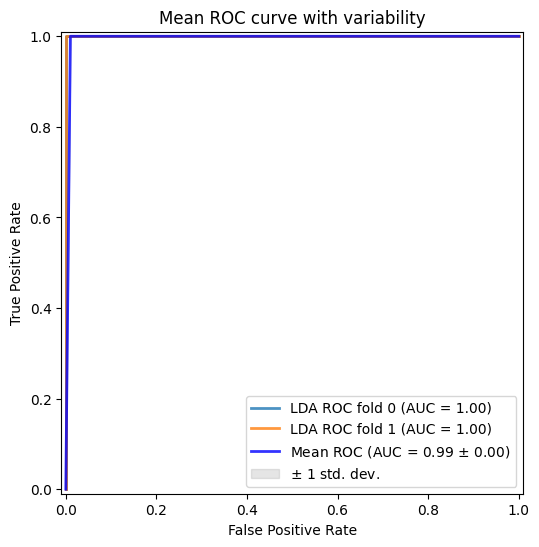

LDA: 0.708333 (0.041667)

[0. 1.] [0. 1.]
[0. 1.] [0. 1.]


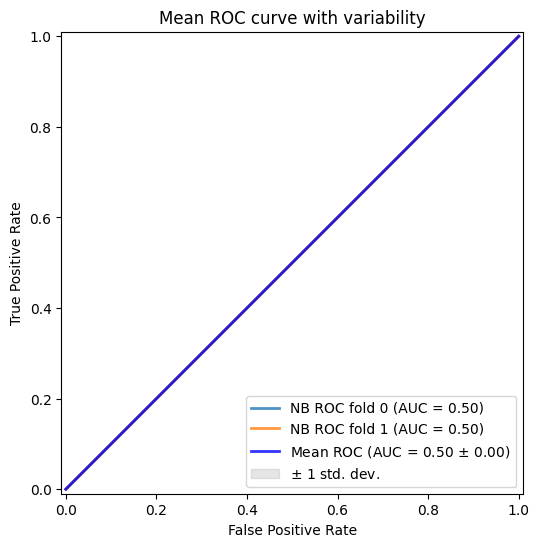

NB: 0.708333 (0.041667)

[0. 0. 0. 1.] [0.         0.33333333 1.         1.        ]
[0. 0. 0. 1.] [0.  0.5 1.  1. ]


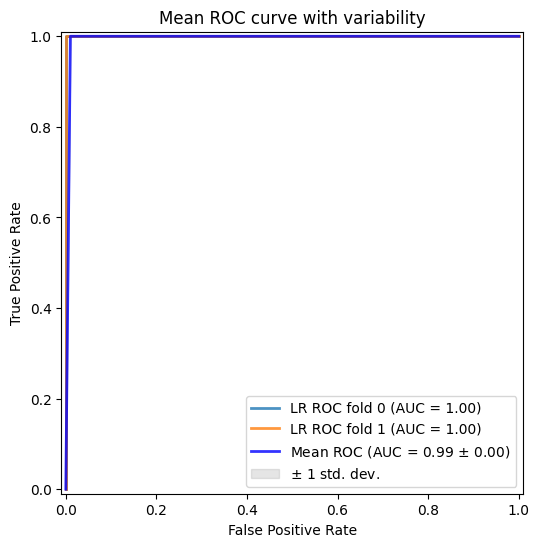

LR: 1.000000 (0.000000)

[0. 0. 0. 1.] [0.         0.66666667 1.         1.        ]
[0. 0. 0. 1.] [0.  0.5 1.  1. ]


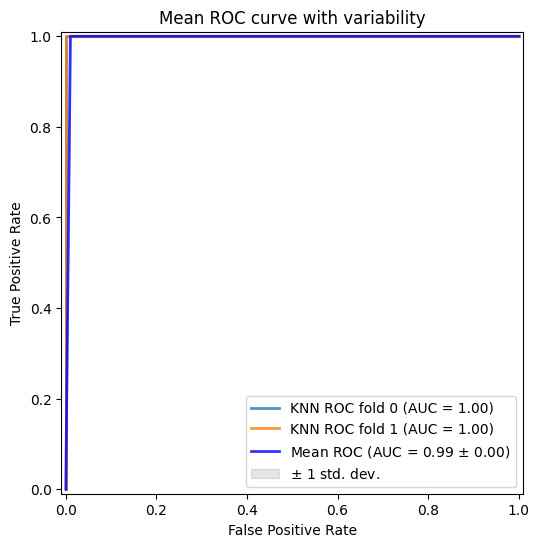

KNN: 1.000000 (0.000000)

[0. 1.] [0. 1.]
[0. 0. 1.] [0. 1. 1.]


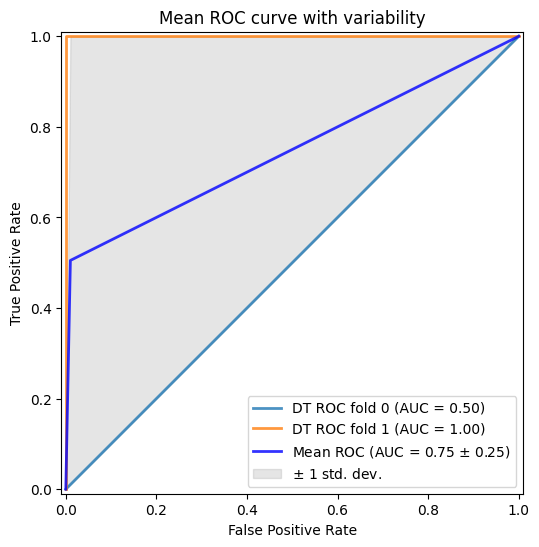

DT: 0.583333 (0.083333)

[0. 1. 1.] [0. 0. 1.]
[0. 1. 1.] [0. 0. 1.]


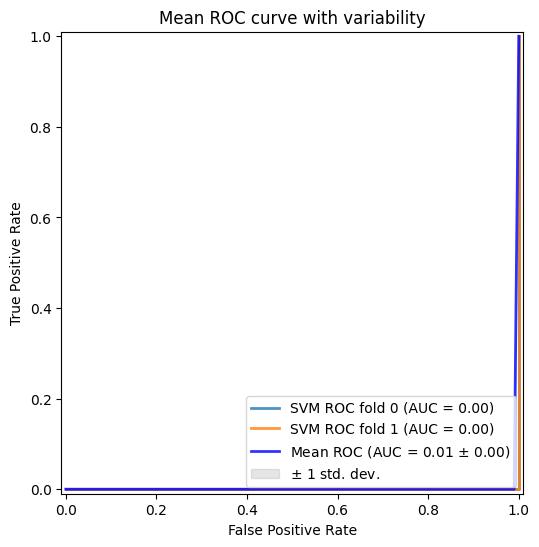

SVM: 0.708333 (0.041667)

[0. 0. 0. 1. 1.] [0.         0.33333333 0.66666667 0.66666667 1.        ]
[0. 0. 0. 1.] [0.  0.5 1.  1. ]


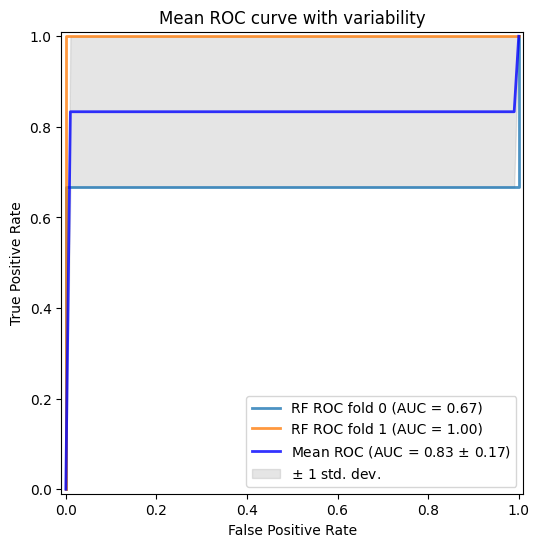

RF: 0.875000 (0.125000)

Best model LR with accuracy:1.0


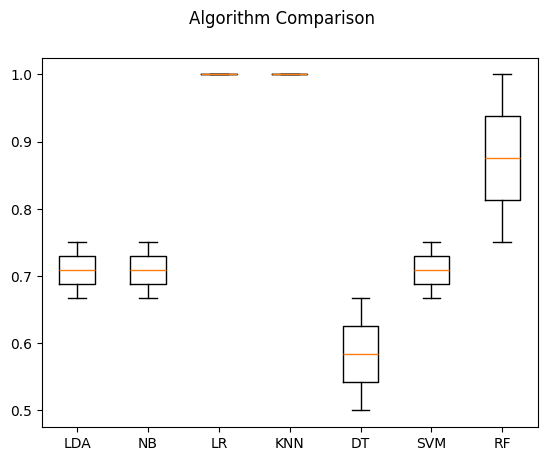

In [29]:
models = comparazioneBaseline(X_train, y_train, 'accuracy', class_weight=False)

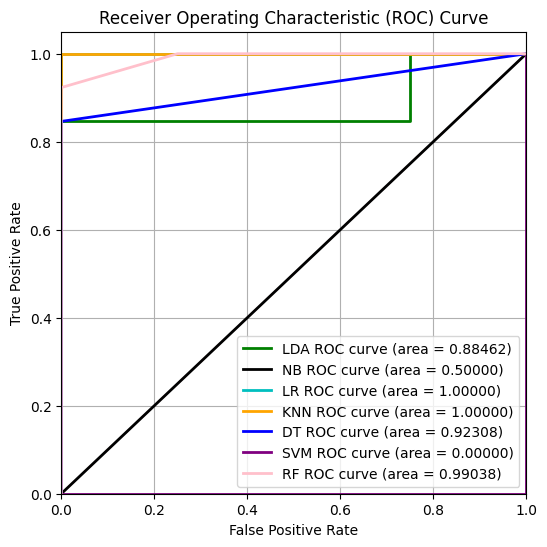

LogisticRegression() 1.0


In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 6))
best_score = 0.0
best_model = None
colors = ["g", "k", "c", "orange", "b", "purple", "pink"]

plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')  # Diagonal line

for i, (name, model) in enumerate(models):

    color = colors[i]
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Assuming y_true are the true labels and y_pred_prob are the predicted probabilities

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve with precise data points
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} ROC curve (area = {roc_auc:.5f})')
    if roc_auc > best_score:
      best_score = roc_auc
      best_model = model

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print(best_model, best_score)

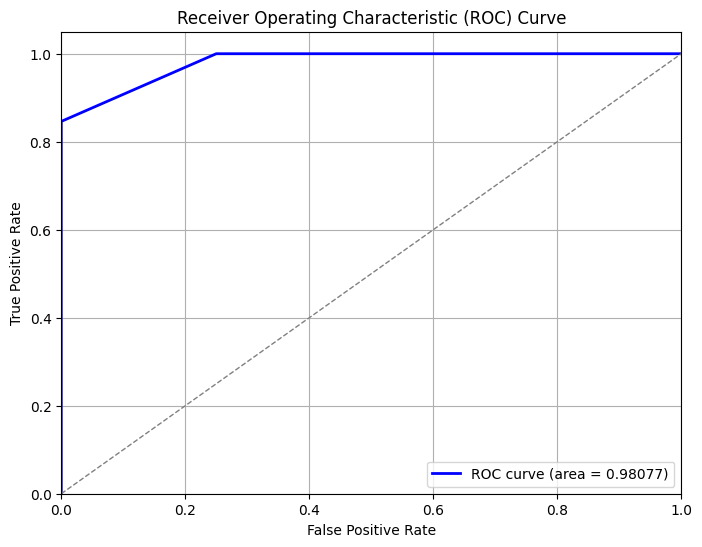

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

RFC = RandomForestClassifier(max_depth=5, n_estimators=5, class_weight = 'balanced').fit(X_train, y_train)
y_pred = RFC.predict(X_test)
y_pred_prob = RFC.predict_proba(X_test)[:, 1]

# Assuming y_true are the true labels and y_pred_prob are the predicted probabilities

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve with precise data points
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [32]:
# Get feature importances
importances = RFC.feature_importances_

genes = data.columns[:-1]
# Create a DataFrame to view the gene importances
feature_importances = pd.DataFrame({
    'Gene': genes,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

C:\Users\ugo-c\AppData\Local\Temp\ipykernel_20308\248882290.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Gene', data=top_genes, palette='viridis')


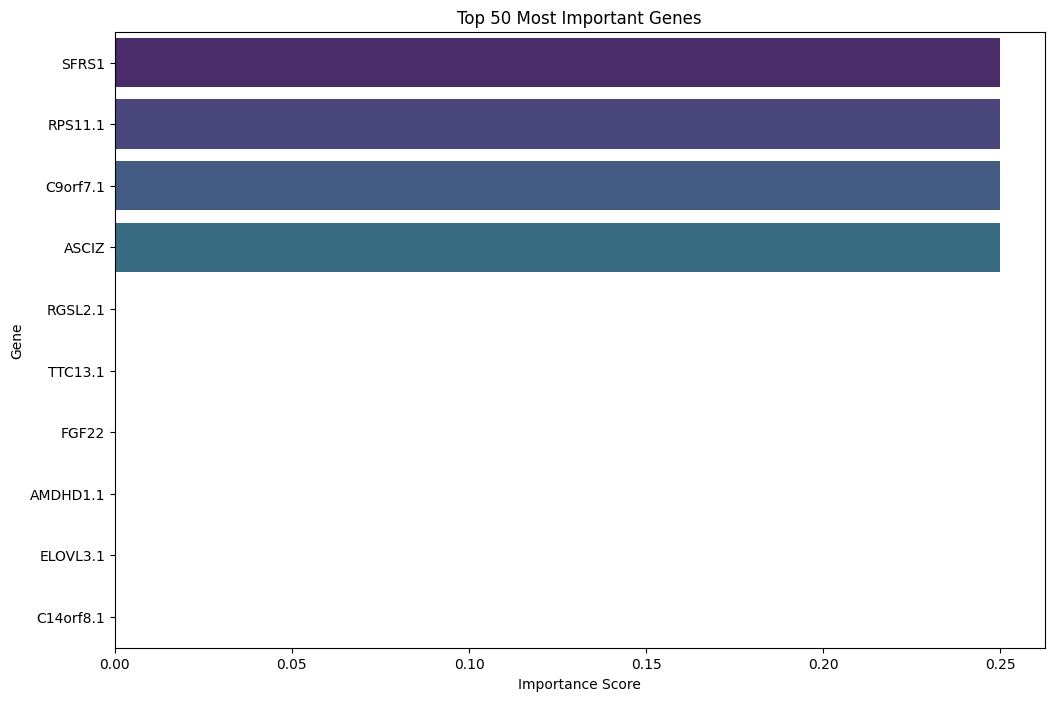

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `feature_importances` DataFrame is already prepared
top_genes = feature_importances.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Gene', data=top_genes, palette='viridis')
plt.title('Top 50 Most Important Genes')
plt.xlabel('Importance Score')
plt.ylabel('Gene')
plt.show()

C:\Users\ugo-c\anaconda3\envs\adin\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\ugo-c\AppData\Local\Temp\ipykernel_20308\678436689.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mean Absolute SHAP Value', y='Gene', data=feature_importances, palette='viridis')


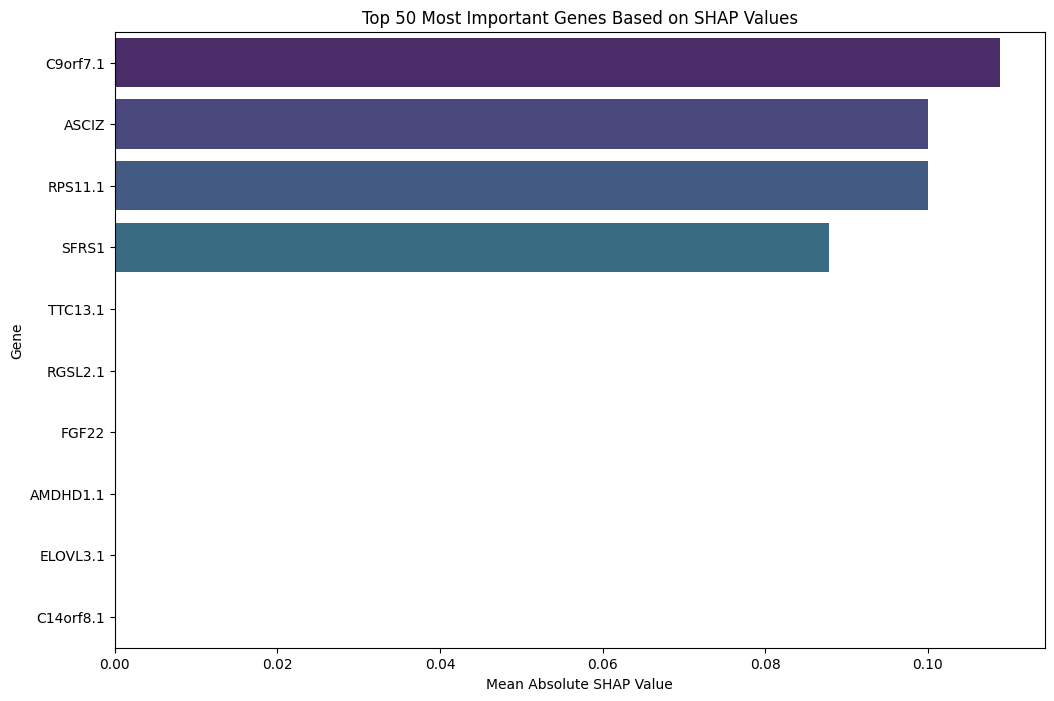

In [34]:
import shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fit your model (assuming model and X_train are already defined)
explainer = shap.Explainer(RFC)
shap_values = explainer(X_test)

# Convert SHAP values to a DataFrame
# Use shap_values.values[:, :, 1] for binary classification if you want the positive class
shap_df = pd.DataFrame(shap_values.values[:, :, 1], columns=genes)

# Calculate mean absolute SHAP values per feature
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)

# Create DataFrame for plotting
feature_importances = pd.DataFrame({
    'Gene': mean_abs_shap.index,
    'Mean Absolute SHAP Value': mean_abs_shap.values
}).head(10)  # Select top 50 features

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Mean Absolute SHAP Value', y='Gene', data=feature_importances, palette='viridis')
plt.title('Top 50 Most Important Genes Based on SHAP Values')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Gene')
plt.show()

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=50, learning_rate="adaptive",  random_state=42, verbose = True)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Iteration 1, loss = 0.75203524
Iteration 2, loss = 4.77756165
Iteration 3, loss = 1.79253726
Iteration 4, loss = 1.68237057
Iteration 5, loss = 0.30379670
Iteration 6, loss = 0.27128180
Iteration 7, loss = 0.39700389
Iteration 8, loss = 0.10525989
Iteration 9, loss = 0.02160323
Iteration 10, loss = 0.03056608
Iteration 11, loss = 0.06640871
Iteration 12, loss = 0.07525787
Iteration 13, loss = 0.05516095
Iteration 14, loss = 0.01906911
Iteration 15, loss = 0.00674478
Iteration 16, loss = 0.00565441
Iteration 17, loss = 0.01005607
Iteration 18, loss = 0.01498972
Iteration 19, loss = 0.01387445
Iteration 20, loss = 0.00977925
Iteration 21, loss = 0.00636847
Iteration 22, loss = 0.00399841
Iteration 23, loss = 0.00289263
Iteration 24, loss = 0.00228779
Iteration 25, loss = 0.00203114
Iteration 26, loss = 0.00200385
Iteration 27, loss = 0.00213265
Iteration 28, loss = 0.00179184
Iteration 29, loss = 0.00170930
Iteration 30, loss = 0.00163122
Iteration 31, loss = 0.00162972
Iteration 32, los

In [36]:
def plot_cm(classes, cm):

    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import itertools

    sns.set(style='white')
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.imshow(cm, cmap = "Blues")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(labelsize=20, length=0)

    ax.set_title('Confusion Matrix', size=24, pad=20)
    ax.set_xlabel('Predicted', size=20)
    ax.set_ylabel('Target', size=20)

    nclasses = len(classes)
    ticks = np.arange(0, nclasses, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center", size = 20,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

In [37]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, accuracy_score, f1_score, recall_score, precision_score

def validate_model(y_trues, y_preds):

    acc = accuracy_score(y_trues, y_preds)
    f1 = f1_score(y_trues, y_preds)
    specificity = recall_score(y_trues, y_preds, pos_label=0)
    sensitivity = recall_score(y_trues, y_preds)
    precision =  precision_score(y_trues, y_preds)
    aucs = roc_auc_score(y_trues, y_preds)
    auc = np.mean(aucs)


    cr = classification_report(y_trues, y_preds)
    cm = confusion_matrix(y_trues, y_preds)
    metrics = {
        "accuracy": acc,
        "f1": f1,
        "cm": cm,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "auc_score": auc,
        "precision": precision,
        "report": cr,
        "predictions": y_preds,
    }

    classes = {"Control": 0, "Cancer": 1}
    plot_cm(classes, cm)

    return metrics, "Accuracy: {} \n F1 score: {} \n Sensitivity: {} \n Specificity: {} \n ROC AUC score: {} \n Confusion Matrix: \n {} \n Classification Report: \n {} \n".format(acc, f1, sensitivity, specificity, auc, cm, cr)

In [38]:
models

[('LDA', LinearDiscriminantAnalysis()),
 ('NB', GaussianNB()),
 ('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier(n_neighbors=2, weights='distance')),
 ('DT', DecisionTreeClassifier()),
 ('SVM', SVC(probability=True)),
 ('RF', RandomForestClassifier(max_depth=5, n_estimators=20))]

LDA


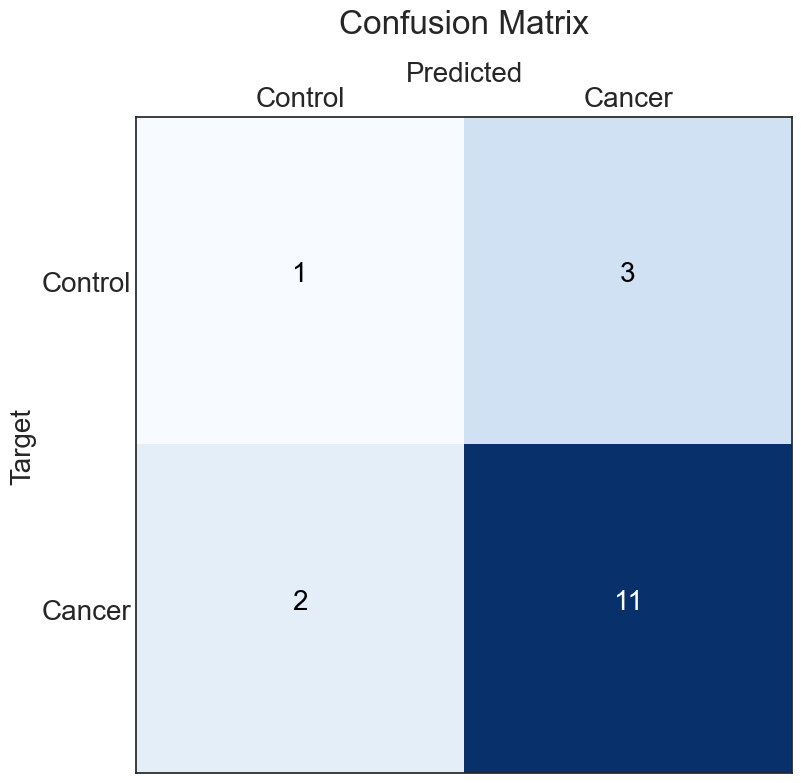

NB


C:\Users\ugo-c\anaconda3\envs\adin\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ugo-c\anaconda3\envs\adin\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ugo-c\anaconda3\envs\adin\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


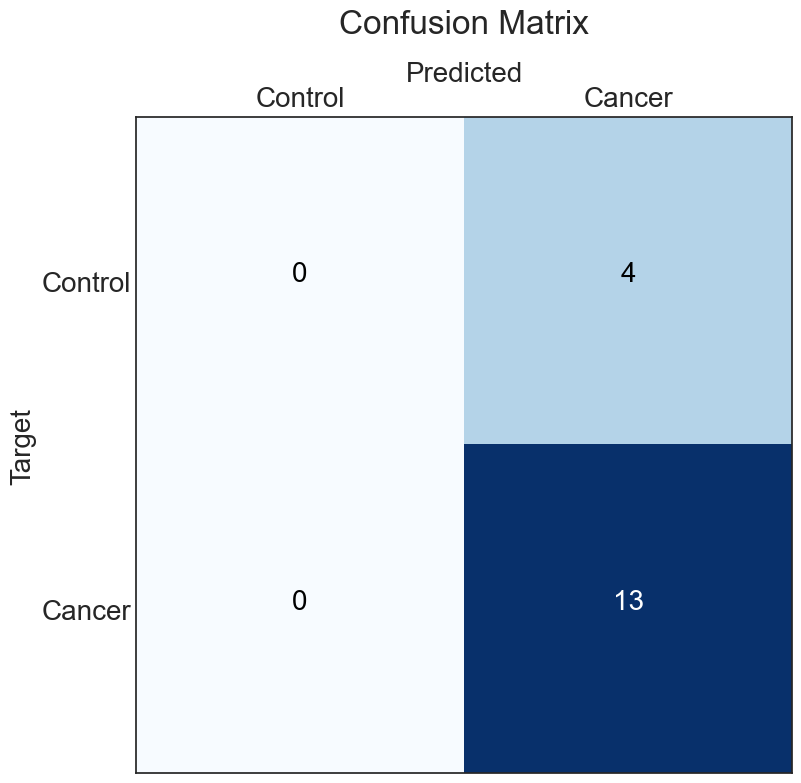

LR


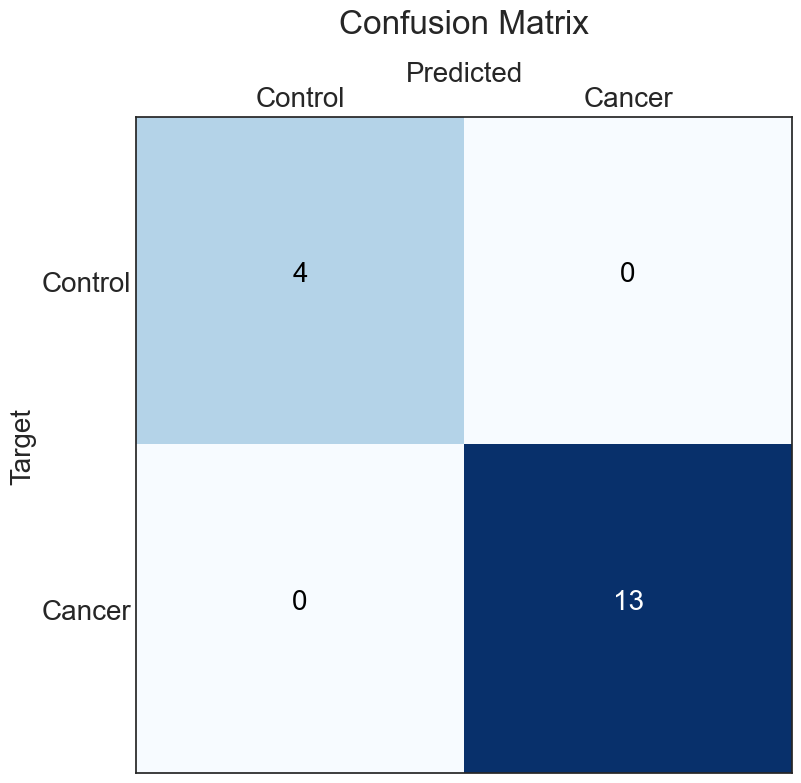

KNN


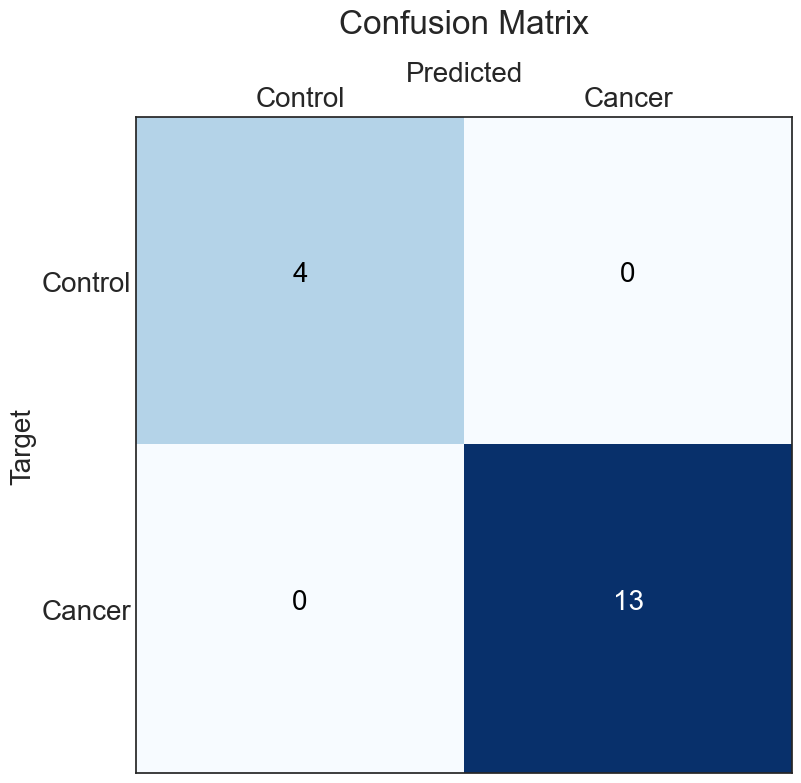

DT


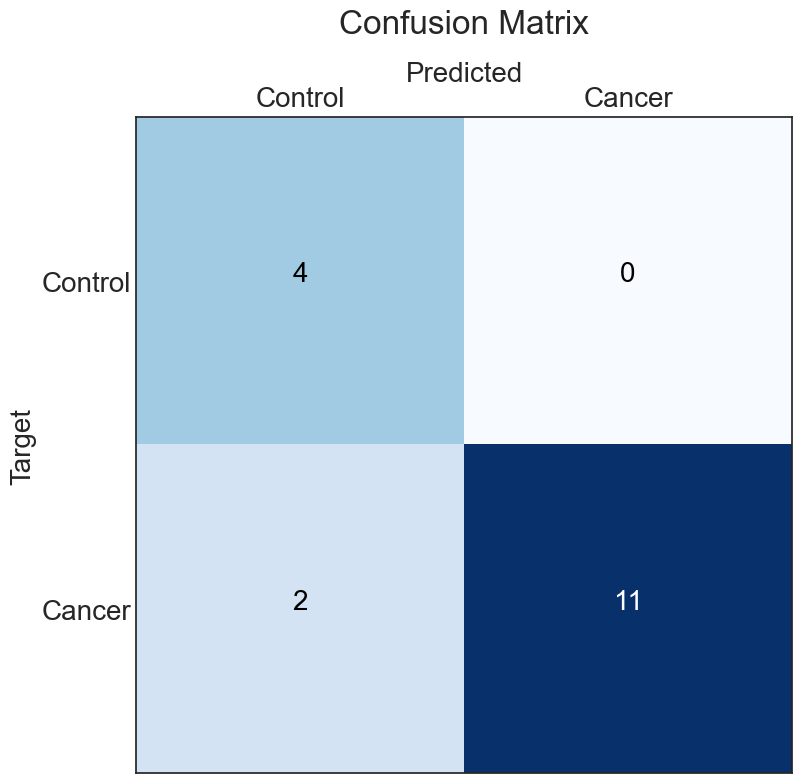

SVM


C:\Users\ugo-c\anaconda3\envs\adin\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ugo-c\anaconda3\envs\adin\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ugo-c\anaconda3\envs\adin\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


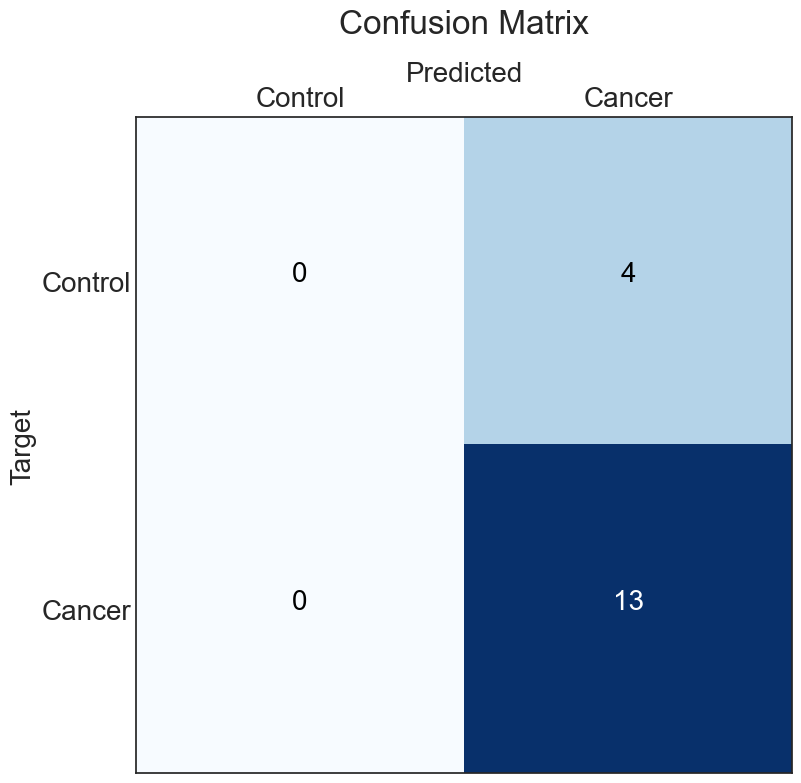

RF


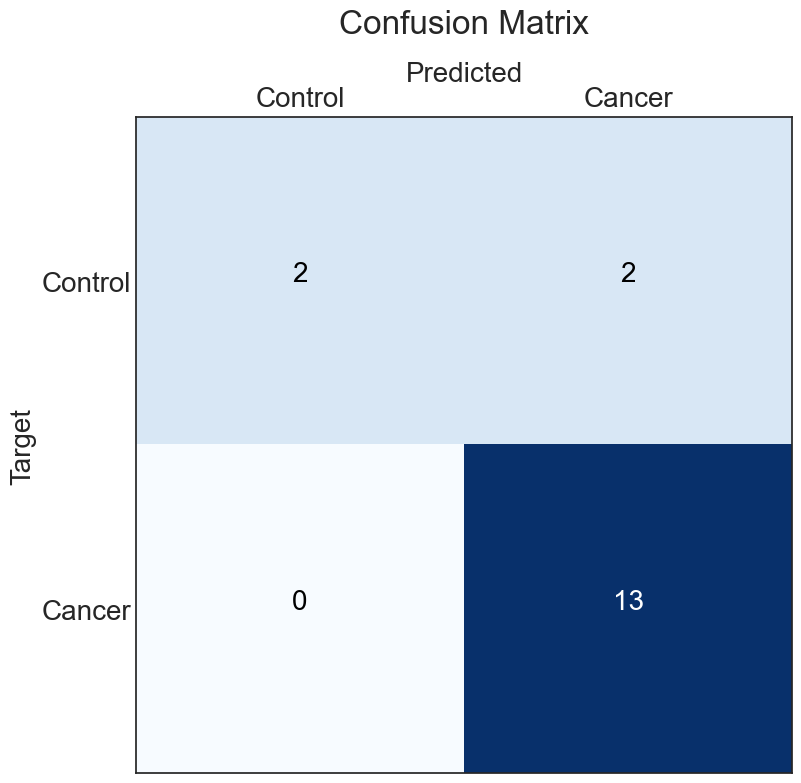

Model Name  Accuracy        f1  sensitivity  specificity  auc_score  \
2         LR  1.000000  1.000000     1.000000         1.00   1.000000   
3        KNN  1.000000  1.000000     1.000000         1.00   1.000000   
4         DT  0.882353  0.916667     0.846154         1.00   0.923077   
6         RF  0.882353  0.928571     1.000000         0.50   0.750000   
0        LDA  0.705882  0.814815     0.846154         0.25   0.548077   
1         NB  0.764706  0.866667     1.000000         0.00   0.500000   
5        SVM  0.764706  0.866667     1.000000         0.00   0.500000   

   precision  
2   1.000000  
3   1.000000  
4   1.000000  
6   0.866667  
0   0.785714  
1   0.764706  
5   0.764706

In [39]:
df = pd.DataFrame([], columns = ["Model Name", "Accuracy", "f1", "sensitivity", "specificity", "auc_score", "precision"])
for i, (model_name, model) in enumerate(models):

    print(model_name)
    y_pred = model.predict(X_test)
    metrics, msg = validate_model(y_test, y_pred)
    acc = metrics['accuracy']
    f1 = metrics['f1']
    sensitivity = metrics['sensitivity']
    specificity = metrics['specificity']
    auc = metrics['auc_score']
    precision = metrics['precision']
    df.loc[i] = [model_name, acc, f1, sensitivity, specificity, auc, precision]

df = df.sort_values(by = 'auc_score', ascending = False)
df

In [40]:
df.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format)

'\\begin{tabular}{lrrrrrr}\n\\toprule\nModel Name & Accuracy & f1 & sensitivity & specificity & auc_score & precision \\\\\n\\midrule\nLR & 1.000 & 1.000 & 1.000 & 1.000 & 1.000 & 1.000 \\\\\nKNN & 1.000 & 1.000 & 1.000 & 1.000 & 1.000 & 1.000 \\\\\nDT & 0.882 & 0.917 & 0.846 & 1.000 & 0.923 & 1.000 \\\\\nRF & 0.882 & 0.929 & 1.000 & 0.500 & 0.750 & 0.867 \\\\\nLDA & 0.706 & 0.815 & 0.846 & 0.250 & 0.548 & 0.786 \\\\\nNB & 0.765 & 0.867 & 1.000 & 0.000 & 0.500 & 0.765 \\\\\nSVM & 0.765 & 0.867 & 1.000 & 0.000 & 0.500 & 0.765 \\\\\n\\bottomrule\n\\end{tabular}\n'

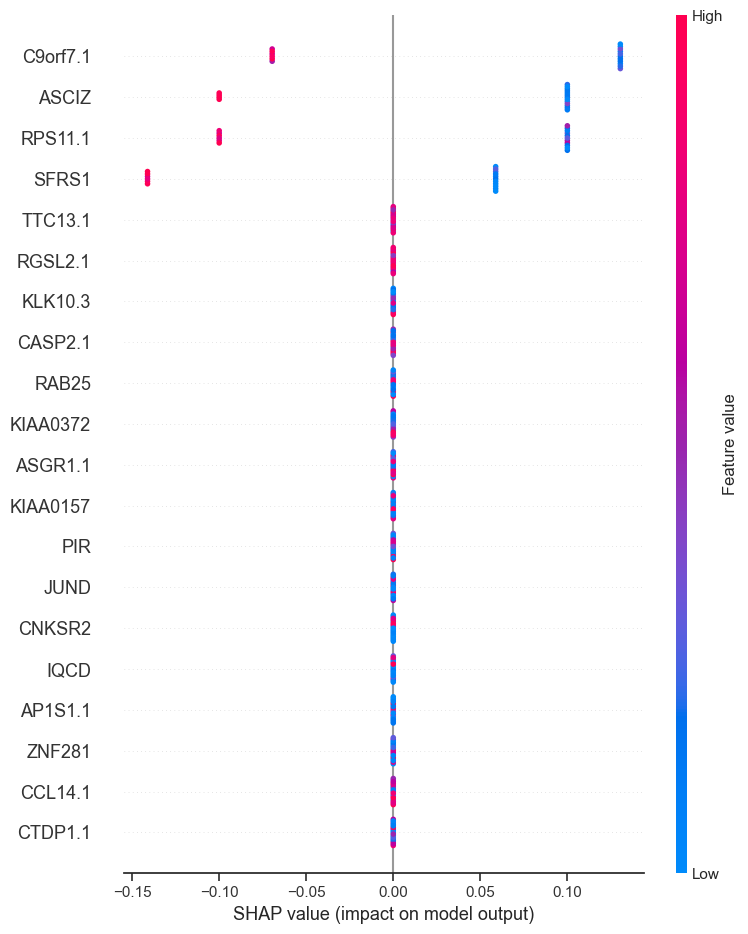

In [41]:
import shap

# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(RFC)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

# Make plot
shap.summary_plot(shap_values[:, :, 1], X_test, max_display=20, sort = True, feature_names=genes)

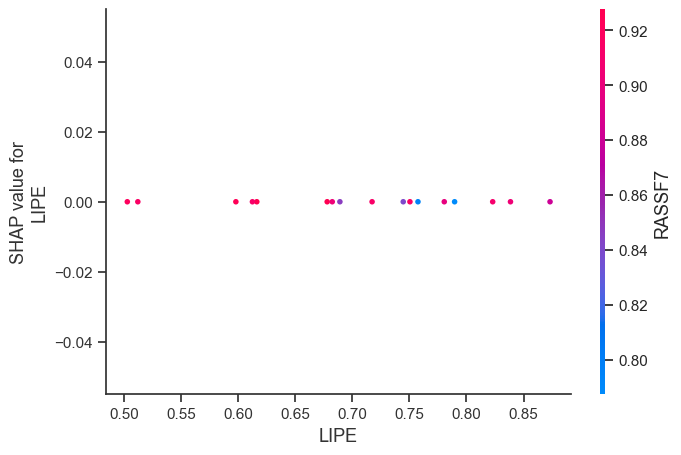

In [42]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(RFC)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X_test)

# make plot.
shap.dependence_plot('LIPE', shap_values[:, :, 0], X_test, interaction_index="RASSF7", feature_names=genes)

In [43]:
shap_values.shape

(17, 27551, 2)

In [44]:
genes = data.columns
genes = genes[:-1]
genes

Index(['ATP2A1', 'SLMAP', 'MEOX2', 'HOXD3', 'ZNF398', 'PANX1', 'COX8C',
       'IMPA2', 'TTC8', 'FLJ35816',
       ...
       'A2ML1.1', 'ZFP2.1', 'CST9L.1', 'C11orf24.1', 'QPRT.1', 'LEPRE1.1',
       'GNAS.29', 'RPN1.1', 'CYB5A.1', 'AP1S1.1'],
      dtype='object', length=27551)

In [45]:
# Calculate Shap values

explainer = shap.TreeExplainer(RFC)

index = 0
y = y_test[index]
print(y)
choosen_instance = X_test[index, :]
shap_values = explainer.shap_values(choosen_instance)[:, y]
shap.initjs()
expected_value = explainer.expected_value[y] 
shap.force_plot(expected_value, shap_values, choosen_instance, feature_names=genes)

1


In [94]:
import shap 
from dash_shap_components import ForcePlot

def get_plot(gid, style, model, model_name, X_test, y_test, genes, index = 0, top_n = 20, X_train = None, class_id = 1, title=None):
     
    if model_name == "DT" or model_name == "RF":
        explainer = shap.Explainer(model)
    elif model_name == "LR":
        explainer = shap.Explainer(model, X_train)
    elif model_name == "SVM" or model_name == "KNN":
        return None
    else:
        raise Exception("Model {} not supported.".format(model_name))
     
    y = y_test[index]
    choosen_instance = X_test[index, :]

    shap_values = explainer.shap_values(choosen_instance)
    if shap_values.ndim == 2:
        shap_values = shap_values[:, class_id]
        expected_value = explainer.expected_value[class_id]
    else:
        expected_value = explainer.expected_value

    features = {i: {'effect': shap_values[i], 'value': choosen_instance[i]} for i in range(shap_values.shape[0])}
    featureNames = {i: gene for i, gene in enumerate(genes)}

    # Combine features and SHAP values into a list and sort by the absolute SHAP value (impact)
    sorted_features = sorted(features.items(), key=lambda x: abs(x[1]['effect']), reverse=True)
    
    # Select the top N features with the highest impact
    top_features = dict(sorted_features[:top_n])
    
    # Update the feature names accordingly
    top_featureNames = {i: featureNames[i] for i in top_features.keys()}

    return ForcePlot(
            id=gid,
            style=style,
            className='col-md-12',
            title=title,
            baseValue=expected_value,
            outNames=["Output Value"],
            features=top_features,
            featureNames=top_featureNames,
            hideBaseValueLabel=False,
            hideBars=False,
            labelMargin=0,
            plot_cmap=['#DB0011', '#000FFF'],
            # style={'width': '50vw'},
    )

In [97]:
from dash import html, dcc, Input, Output
import dash 

patients = list(data.index)
map_final = {0: "Normal", 1: "Anomalous"} 

app = dash.Dash(__name__, suppress_callback_exceptions=True)
app.title = "Anomaly Detection in Individualized Networks"

patient = patients[0]
y = y_test[0]
plot_title = "Shap Force plot for model {} and patient {} with class {}".format(model_name, patient, map_final[y])

app.layout = html.Div([
    html.Div([
        dcc.Dropdown(
            id='dropdown',
            clearable=False,
            options=[
                {'label': name, 'value': i}
                for i, name in enumerate(patients)
            ]
        ),
        html.Div([
             get_plot("force-plot", {}, RFC, "RF", X_test, y_test, genes, index = 0, top_n = 20, X_train = None, class_id = y, title=plot_title)
        ], id = 'force-plot-div')
    ])
])

@app.callback(
    Output("force-plot-div", "children"),
    Input("dropdown", "value"),
    prevent_initial_call = True
)
def update_forceplot(patient_idx):

    patient = patients[patient_idx]
    y = y_test[patient_idx]
    plot_title = "Shap Force plot for model {} and patient {} with class {}".format(model_name, patient, map_final[y])
    
    return get_plot("force-plot", {}, RFC, "RF", X_test, y_test, genes, index = patient_idx, top_n = 20, X_train = None, class_id = y, title=plot_title)


In [98]:
app.run_server(debug=True)